In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataloading (English)

In [ ]:
import pandas as pd

# Update the file path to your CSV file (adjust as needed)
file_path = '/content/drive/MyDrive/NLP_Project/baseline/data/training/train_en_l1.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Print basic info about the dataset
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns.tolist())
print("\nFirst 5 Rows:")
print(df.head())

# Display data types for each column
print("\nData Types:")
print(df.dtypes)

Dataset Shape: (6531, 8)
Column Names: ['text', 'key', 'en_a1', 'en_a2', 'en_a3', 'en_a4', 'en_a5', 'en_a6']

First 5 Rows:
                                                text         key  en_a1 en_a2  \
0      This is our history . For Shia and Sunni ,...  question_1    NaN   NaN   
1     If this is "grilling" then wht wud u call t...  question_1    NaN   NaN   
2    look at <handle replaced>madam. Locals attac...  question_1    NaN   NaN   
3    our beloved yogi ji has given money home and...  question_1    NaN   NaN   
4  "I gonna kill that bitch"  Bitvj imma kill you...  question_1    NaN   NaN   

  en_a3 en_a4  en_a5  en_a6  
0   NaN   NaN    NaN    0.0  
1   NaN   1.0    NaN    NaN  
2   NaN   NaN    0.0    NaN  
3   NaN   NaN    1.0    NaN  
4   NaN   NaN    NaN    1.0  

Data Types:
text      object
key       object
en_a1    float64
en_a2     object
en_a3     object
en_a4     object
en_a5    float64
en_a6    float64
dtype: object


## Majority Voting for Final Labels

In [ ]:
import pandas as pd
from collections import Counter

# Load CSV file
file_path = '/content/drive/MyDrive/NLP_Project/baseline/data/training/train_en_l1.csv'
df = pd.read_csv(file_path)

# Define annotator column names
annotator_cols = ['en_a1', 'en_a2', 'en_a3', 'en_a4', 'en_a5', 'en_a6']

# Function to compute majority vote while ignoring missing values
def majority_vote(row):
    votes = []

    for col in annotator_cols:
        if pd.notnull(row[col]) and row[col] != '':
            try:
                votes.append(float(row[col]))  # Convert to float
            except (ValueError, TypeError):
                pass

    if not votes:
        return 0.0  # No valid votes, default to 0 (or could be NaN if preferred)

    vote_counts = Counter(votes)  # Count occurrences
    most_common = vote_counts.most_common()

    # Handle tie case
    if len(most_common) > 1 and most_common[0][1] == most_common[1][1]:
        return 0.0  # Tie -> Default to 0

    return most_common[0][0]  # Return most common label

# Apply the function to calculate final labels
df['final_label'] = df.apply(majority_vote, axis=1)

# Display results
print("\nFirst 5 rows with final label:")
print(df[['text'] + annotator_cols + ['final_label']].head())

# Show distribution of final labels
print("\nFinal Label Distribution:")
print(df['final_label'].value_counts())


First 5 rows with final label:
                                                text  en_a1 en_a2 en_a3 en_a4  \
0      This is our history . For Shia and Sunni ,...    NaN   NaN   NaN   NaN   
1     If this is "grilling" then wht wud u call t...    NaN   NaN   NaN   1.0   
2    look at <handle replaced>madam. Locals attac...    NaN   NaN   NaN   NaN   
3    our beloved yogi ji has given money home and...    NaN   NaN   NaN   NaN   
4  "I gonna kill that bitch"  Bitvj imma kill you...    NaN   NaN   NaN   NaN   

   en_a5  en_a6  final_label  
0    NaN    0.0          0.0  
1    NaN    NaN          1.0  
2    0.0    NaN          0.0  
3    1.0    NaN          1.0  
4    NaN    1.0          1.0  

Final Label Distribution:
final_label
0.0    5269
1.0    1262
Name: count, dtype: int64


In [ ]:
# Download necessary NLTK data (if not already available)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## EDA (Data Visualization and Preprocessing)

<ipython-input-17-dc92a6d71f00>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='final_label', palette='viridis')


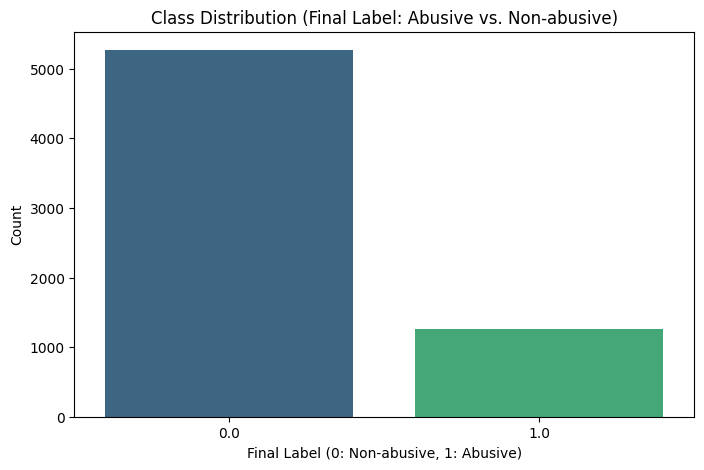

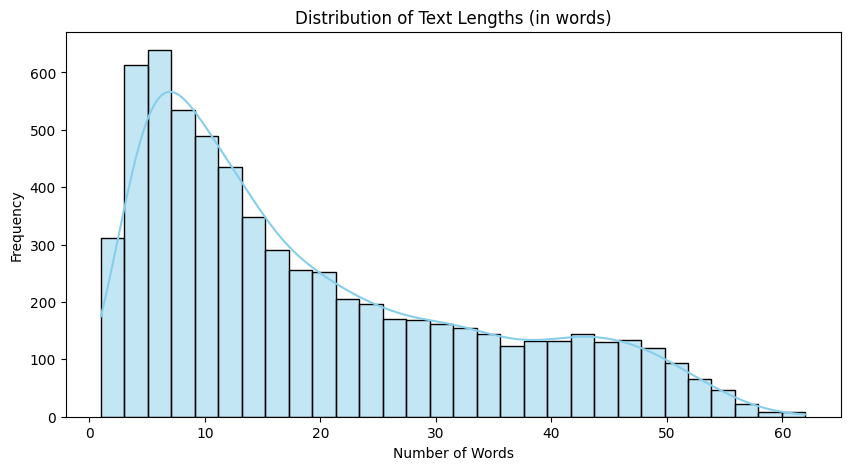

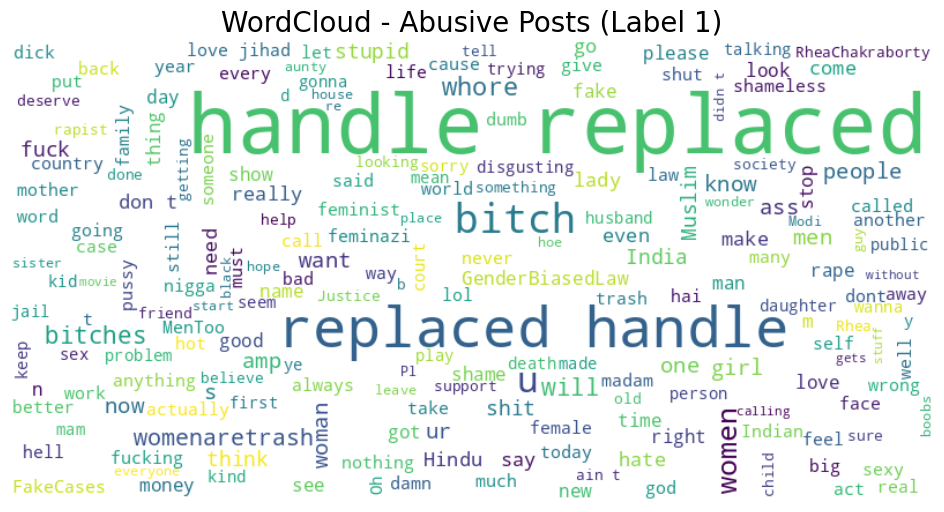

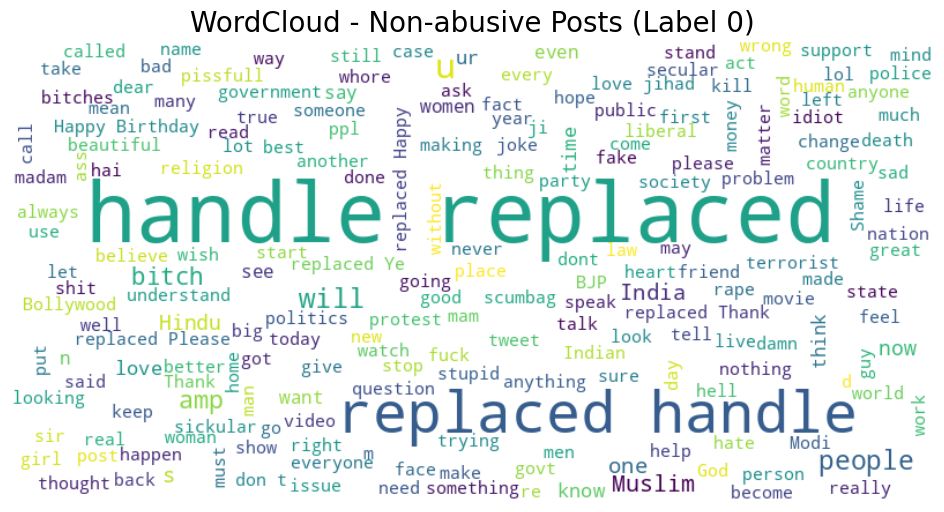

Top 20 words in Abusive Posts (Label 1):
[('handle', 1602), ('replaced', 1598), ('bitch', 266), ('u', 179), ('like', 126), ('women', 115), ('whore', 87), ('bitches', 85), ('womenaretrash', 79), ('get', 74), ('woman', 70), ('amp', 63), ('one', 59), ('men', 57), ('r', 56), ('ur', 52), ('ass', 51), ('love', 51), ('people', 47), ('want', 45)]

Top 20 words in Non-abusive Posts (Label 0):
[('handle', 7907), ('replaced', 7900), ('u', 607), ('like', 446), ('people', 351), ('amp', 326), ('bitch', 314), ('india', 242), ('one', 240), ('love', 234), ('r', 216), ('get', 192), ('time', 170), ('know', 169), ('ur', 168), ('even', 166), ('please', 164), ('muslims', 154), ('women', 147), ('think', 142)]

Top 20 Bigrams in Abusive Posts (Label 1):
[(('handle', 'replaced'), 1598), (('replaced', 'handle'), 584), (('replaced', 'u'), 29), (('replaced', 'bitch'), 29), (('u', 'r'), 24), (('love', 'jihad'), 22), (('wan', 'na'), 14), (('gon', 'na'), 13), (('bad', 'bitch'), 10), (('replaced', 'women'), 9), (('vi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.util import ngrams


# Load dataset
file_path = '/content/drive/MyDrive/NLP_Project/baseline/data/training/train_en_l1.csv'  # Adjust as needed
df = pd.read_csv(file_path)

# Define annotation columns
annotator_cols = ['en_a1', 'en_a2', 'en_a3', 'en_a4', 'en_a5', 'en_a6']

# Convert annotations to numeric, keeping NaNs for missing values
for col in annotator_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Majority Voting Function (Handles Missing Annotations)
def majority_vote(row):
    votes = [row[col] for col in annotator_cols if pd.notnull(row[col])]

    if not votes:
        return 0.0  # Default if no votes are available

    vote_counts = Counter(votes)
    most_common = vote_counts.most_common()

    # Handle tie case
    if len(most_common) > 1 and most_common[0][1] == most_common[1][1]:
        return 0.0  # Tie -> Default to 0

    return most_common[0][0]  # Return majority vote

# Apply majority voting
df['final_label'] = df.apply(majority_vote, axis=1)

# ----- 1. Class Distribution -----
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='final_label', palette='viridis')
plt.title("Class Distribution (Final Label: Abusive vs. Non-abusive)")
plt.xlabel("Final Label (0: Non-abusive, 1: Abusive)")
plt.ylabel("Count")
plt.show()

# ----- 2. Text Length Distribution -----
df['text_length'] = df['text'].astype(str).apply(lambda x: len(x.split()) if x else 0)

plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Text Lengths (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# ----- 3. WordCloud Generation -----
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Generate WordClouds for each class:
abusive_text = " ".join(df[df['final_label'] == 1]['text'].dropna().astype(str).tolist())
non_abusive_text = " ".join(df[df['final_label'] == 0]['text'].dropna().astype(str).tolist())

generate_wordcloud(abusive_text, "WordCloud - Abusive Posts (Label 1)")
generate_wordcloud(non_abusive_text, "WordCloud - Non-abusive Posts (Label 0)")

# ----- 4. Frequent Words and N-grams -----
stop_words = set(stopwords.words('english'))

def get_frequent_words(text_series, top_n=20):
    all_words = []
    for text in text_series.dropna().astype(str).tolist():
        words = word_tokenize(text.lower())
        filtered = [word for word in words if word.isalpha() and word not in stop_words]
        all_words.extend(filtered)
    return Counter(all_words).most_common(top_n)

print("Top 20 words in Abusive Posts (Label 1):")
print(get_frequent_words(df[df['final_label'] == 1]['text']))

print("\nTop 20 words in Non-abusive Posts (Label 0):")
print(get_frequent_words(df[df['final_label'] == 0]['text']))

# Function to extract top n-grams
def get_top_ngrams(text_series, ngram_val=2, top_n=20):
    all_ngrams = []
    for text in text_series.dropna().astype(str).tolist():
        tokens = [word for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words]
        n_grams = list(ngrams(tokens, ngram_val))
        all_ngrams.extend(n_grams)
    return Counter(all_ngrams).most_common(top_n)

print("\nTop 20 Bigrams in Abusive Posts (Label 1):")
print(get_top_ngrams(df[df['final_label'] == 1]['text'], ngram_val=2))

print("\nTop 20 Bigrams in Non-abusive Posts (Label 0):")
print(get_top_ngrams(df[df['final_label'] == 0]['text'], ngram_val=2))

## Dataloading(Hindi)

In [ ]:
import pandas as pd

# Update the file path to your CSV file (adjust as needed)
file_path = '/content/drive/MyDrive/NLP_Project/baseline/data/training/train_hi_l1.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Print basic info about the dataset
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns.tolist())
print("\nFirst 5 Rows:")
print(df.head())

# Display data types for each column
print("\nData Types:")
print(df.dtypes)

Dataset Shape: (6197, 7)
Column Names: ['text', 'key', 'hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']

First 5 Rows:
                                                text         key hi_a1 hi_a2  \
0    भारत में तीन किसान कानून बिल वापस लेने पर भक...  question_1   NaN   NaN   
1    राजस्थान  अजीबोगरीब: गांव की खुशहाली के लिए ...  question_1   NaN   0.0   
2    सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...  question_1   NaN   NaN   
3  !!हर शब्द अमॄतम!!  पुरानी एक कहावत है... टूटी ...  question_1   NaN   NaN   
4  "PM मोदी जी " की माँ के लिए अपशब्द कहने वाला द...  question_1   NaN   1.0   

  hi_a3 hi_a4 hi_a5  
0   NaN   0.0   NaN  
1   NaN   NaN   NaN  
2   NaN   NaN   0.0  
3   NaN   0.0   NaN  
4   NaN   NaN   NaN  

Data Types:
text     object
key      object
hi_a1    object
hi_a2    object
hi_a3    object
hi_a4    object
hi_a5    object
dtype: object


In [ ]:
import pandas as pd
from collections import Counter

# Load CSV file
file_path = '/content/drive/MyDrive/NLP_Project/baseline/data/training/train_hi_l1.csv'
df = pd.read_csv(file_path)

# Define annotator column names
annotator_cols = ['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']

# Function to compute majority vote while ignoring missing values
def majority_vote(row):
    votes = []

    for col in annotator_cols:
        if pd.notnull(row[col]) and row[col] != '':
            try:
                votes.append(float(row[col]))  # Convert to float
            except (ValueError, TypeError):
                pass

    if not votes:
        return 0.0  # No valid votes, default to 0 (or could be NaN if preferred)

    vote_counts = Counter(votes)  # Count occurrences
    most_common = vote_counts.most_common()

    # Handle tie case (if exactly equal votes for 0 and 1, assign 0)
    if len(most_common) > 1 and most_common[0][1] == most_common[1][1]:
        return 0.0  # Default to non-abusive label (0)

    return most_common[0][0]  # Return most common label

# Apply the function to calculate final labels
df['final_label'] = df.apply(majority_vote, axis=1)

# Ensure labels are only 0 or 1
df['final_label'] = df['final_label'].astype(int)  # Convert to integer

# Display results
print("\nFirst 5 rows with final label:")
print(df[['text'] + annotator_cols + ['final_label']].head())

# Show distribution of final labels
print("\nFinal Label Distribution:")
print(df['final_label'].value_counts())


First 5 rows with final label:
                                                text hi_a1 hi_a2 hi_a3 hi_a4  \
0    भारत में तीन किसान कानून बिल वापस लेने पर भक...   NaN   NaN   NaN   0.0   
1    राजस्थान  अजीबोगरीब: गांव की खुशहाली के लिए ...   NaN   0.0   NaN   NaN   
2    सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...   NaN   NaN   NaN   NaN   
3  !!हर शब्द अमॄतम!!  पुरानी एक कहावत है... टूटी ...   NaN   NaN   NaN   0.0   
4  "PM मोदी जी " की माँ के लिए अपशब्द कहने वाला द...   NaN   1.0   NaN   NaN   

  hi_a5  final_label  
0   NaN            0  
1   NaN            0  
2   0.0            0  
3   NaN            0  
4   NaN            1  

Final Label Distribution:
final_label
0    4437
1    1760
Name: count, dtype: int64


<ipython-input-7-cd62d68c0515>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='final_label', palette='viridis')


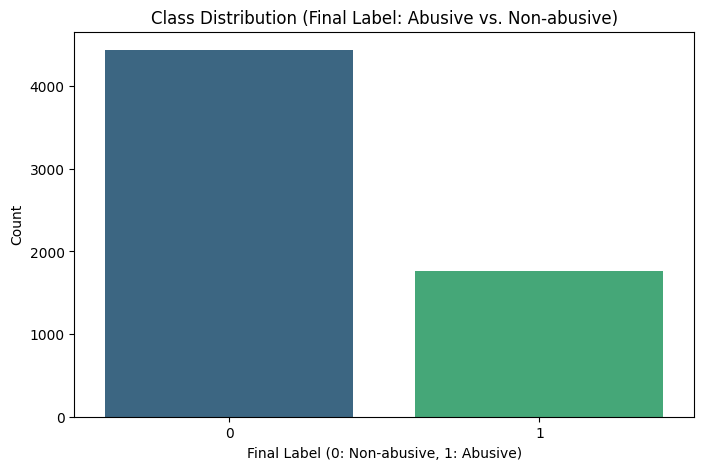

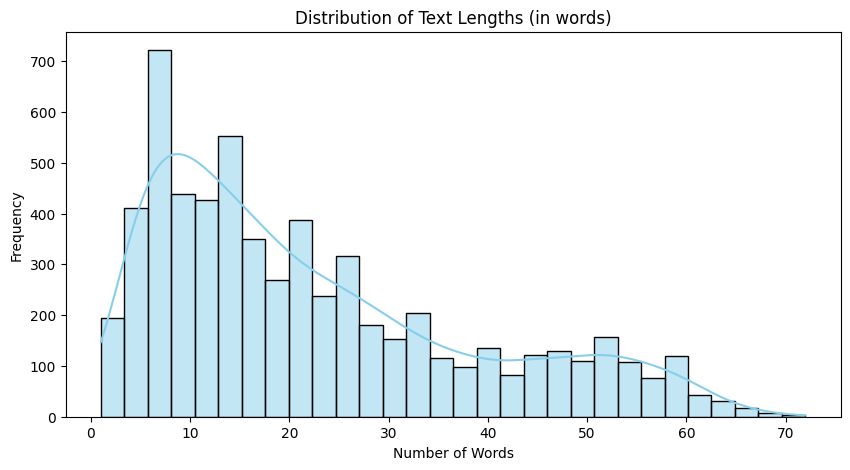

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.util import ngrams


# Load CSV file
file_path = '/content/drive/MyDrive/NLP_Project/baseline/data/training/train_hi_l1.csv'
df = pd.read_csv(file_path)

# Define annotator column names
annotator_cols = ['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']

# Convert annotations to numeric, keeping NaNs for missing values
for col in annotator_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Majority Voting Function (Handles Missing Annotations)
def majority_vote(row):
    votes = [row[col] for col in annotator_cols if pd.notnull(row[col])]

    if not votes:
        return 0.0  # Default if no votes are available

    vote_counts = Counter(votes)
    most_common = vote_counts.most_common()

    # Handle tie case
    if len(most_common) > 1 and most_common[0][1] == most_common[1][1]:
        return 0.0  # Tie -> Default to 0

    return most_common[0][0]  # Return majority vote

# Apply the function to calculate final labels
df['final_label'] = df.apply(majority_vote, axis=1)

# Ensure labels are only 0 or 1
df['final_label'] = df['final_label'].astype(int)  # Convert to integer

# ----- 1. Class Distribution -----
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='final_label', palette='viridis')
plt.title("Class Distribution (Final Label: Abusive vs. Non-abusive)")
plt.xlabel("Final Label (0: Non-abusive, 1: Abusive)")
plt.ylabel("Count")
plt.show()

# ----- 2. Text Length Distribution -----
df['text_length'] = df['text'].astype(str).apply(lambda x: len(x.split()) if x else 0)

plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Text Lengths (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

## Dataloading(Tamil)

In [ ]:
import pandas as pd

# Update the file path to your CSV file (adjust as needed)
file_path = '/content/drive/MyDrive/NLP_Project/baseline/data/training/train_ta_l1.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Print basic info about the dataset
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns.tolist())
print("\nFirst 5 Rows:")
print(df.head())

# Display data types for each column
print("\nData Types:")
print(df.dtypes)

Dataset Shape: (6779, 8)
Column Names: ['text', 'key', 'ta_a1', 'ta_a2', 'ta_a3', 'ta_a4', 'ta_a5', 'ta_a6']

First 5 Rows:
                                                text         key  ta_a1 ta_a2  \
0     *1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி...  question_1    NaN   NaN   
1     சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக...  question_1    NaN   NaN   
2           தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா  question_1    NaN   NaN   
3      பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆  question_1    NaN   NaN   
4    என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ...  question_1    1.0   NaN   

   ta_a3  ta_a4  ta_a5 ta_a6  
0    0.0    0.0    0.0   0.0  
1    NaN    0.0    NaN   NaN  
2    NaN    NaN    0.0   NaN  
3    NaN    NaN    1.0   NaN  
4    NaN    NaN    NaN   NaN  

Data Types:
text      object
key       object
ta_a1    float64
ta_a2     object
ta_a3    float64
ta_a4    float64
ta_a5    float64
ta_a6     object
dtype: object


In [ ]:
import pandas as pd
from collections import Counter

# Load CSV file
file_path = '/content/drive/MyDrive/NLP_Project/baseline/data/training/train_hi_l1.csv'
df = pd.read_csv(file_path)

# Define annotator column names
annotator_cols = ['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']

# Function to compute majority vote while ignoring missing values
def majority_vote(row):
    votes = []

    for col in annotator_cols:
        if pd.notnull(row[col]) and row[col] != '':
            try:
                votes.append(float(row[col]))  # Convert to float
            except (ValueError, TypeError):
                pass

    if not votes:
        return 0.0  # No valid votes, default to 0 (or could be NaN if preferred)

    vote_counts = Counter(votes)  # Count occurrences
    most_common = vote_counts.most_common()

    # Handle tie case (if exactly equal votes for 0 and 1, assign 0)
    if len(most_common) > 1 and most_common[0][1] == most_common[1][1]:
        return 0.0  # Default to non-abusive label (0)

    return most_common[0][0]  # Return most common label

# Apply the function to calculate final labels
df['final_label'] = df.apply(majority_vote, axis=1)

# Ensure labels are only 0 or 1
df['final_label'] = df['final_label'].astype(int)  # Convert to integer

# Display results
print("\nFirst 5 rows with final label:")
print(df[['text'] + annotator_cols + ['final_label']].head())

# Show distribution of final labels
print("\nFinal Label Distribution:")
print(df['final_label'].value_counts())


First 5 rows with final label:
                                                text hi_a1 hi_a2 hi_a3 hi_a4  \
0    भारत में तीन किसान कानून बिल वापस लेने पर भक...   NaN   NaN   NaN   0.0   
1    राजस्थान  अजीबोगरीब: गांव की खुशहाली के लिए ...   NaN   0.0   NaN   NaN   
2    सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...   NaN   NaN   NaN   NaN   
3  !!हर शब्द अमॄतम!!  पुरानी एक कहावत है... टूटी ...   NaN   NaN   NaN   0.0   
4  "PM मोदी जी " की माँ के लिए अपशब्द कहने वाला द...   NaN   1.0   NaN   NaN   

  hi_a5  final_label  
0   NaN            0  
1   NaN            0  
2   0.0            0  
3   NaN            0  
4   NaN            1  

Final Label Distribution:
final_label
0    4437
1    1760
Name: count, dtype: int64


<ipython-input-10-cd62d68c0515>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='final_label', palette='viridis')


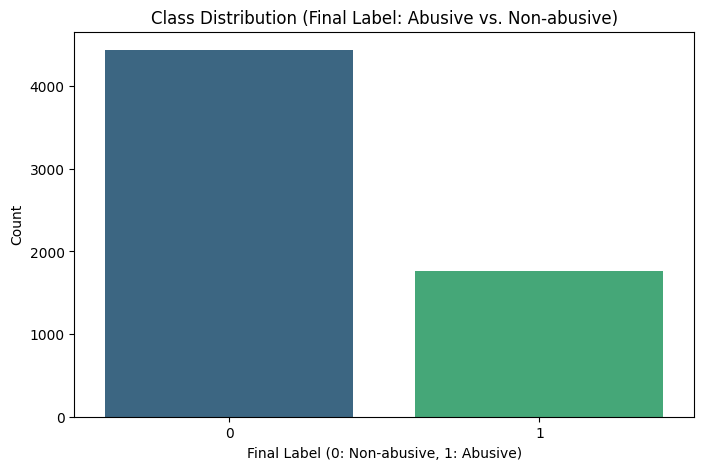

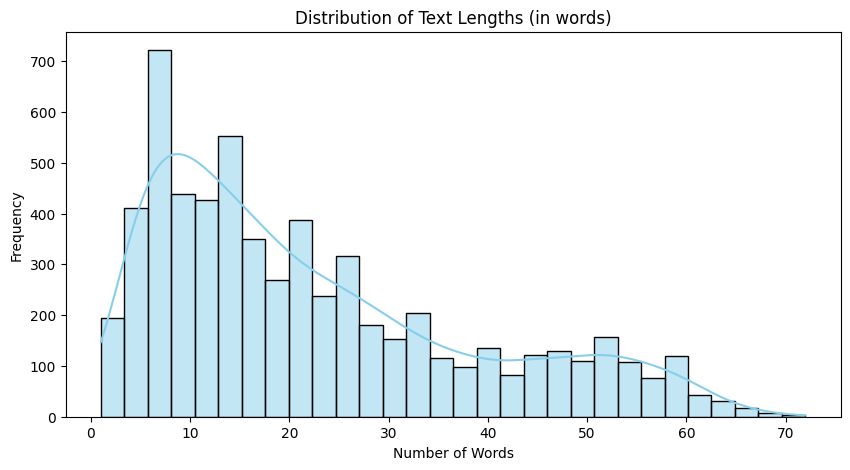

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.util import ngrams


# Load CSV file
file_path = '/content/drive/MyDrive/NLP_Project/baseline/data/training/train_hi_l1.csv'
df = pd.read_csv(file_path)

# Define annotator column names
annotator_cols = ['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']

# Convert annotations to numeric, keeping NaNs for missing values
for col in annotator_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Majority Voting Function (Handles Missing Annotations)
def majority_vote(row):
    votes = [row[col] for col in annotator_cols if pd.notnull(row[col])]

    if not votes:
        return 0.0  # Default if no votes are available

    vote_counts = Counter(votes)
    most_common = vote_counts.most_common()

    # Handle tie case
    if len(most_common) > 1 and most_common[0][1] == most_common[1][1]:
        return 0.0  # Tie -> Default to 0

    return most_common[0][0]  # Return majority vote

# Apply the function to calculate final labels
df['final_label'] = df.apply(majority_vote, axis=1)

# Ensure labels are only 0 or 1
df['final_label'] = df['final_label'].astype(int)  # Convert to integer

# ----- 1. Class Distribution -----
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='final_label', palette='viridis')
plt.title("Class Distribution (Final Label: Abusive vs. Non-abusive)")
plt.xlabel("Final Label (0: Non-abusive, 1: Abusive)")
plt.ylabel("Count")
plt.show()

# ----- 2. Text Length Distribution -----
df['text_length'] = df['text'].astype(str).apply(lambda x: len(x.split()) if x else 0)

plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Text Lengths (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

## Combining CSV's into single dataframe(Label1)

In [ ]:
import pandas as pd
import re
from collections import Counter

# ------------------------------
# 1. Combine All Train Files
# ------------------------------

def majority_vote(row, annotator_cols):
    votes = [row[col] for col in annotator_cols if pd.notnull(row[col])]
    if not votes:
        return 0  # Default if no votes available
    vote_counts = Counter(votes)
    most_common = vote_counts.most_common()
    # In case of a tie, default to 0
    if len(most_common) > 1 and most_common[0][1] == most_common[1][1]:
        return 0
    return most_common[0][0]

# List of training files
train_files = [
    "/content/drive/MyDrive/NLP_Project/baseline/data/training/train_en_l1.csv",
    "/content/drive/MyDrive/NLP_Project/baseline/data/training/train_hi_l1.csv",
    "/content/drive/MyDrive/NLP_Project/baseline/data/training/train_ta_l1.csv"
]

dfs = []

for f in train_files:
    temp_df = pd.read_csv(f)

    # Identify language and corresponding annotator columns
    if "_en_" in f:
        annotator_cols = ["en_a1", "en_a2", "en_a3", "en_a4", "en_a5", "en_a6"]
        temp_df["language"] = "en"
    elif "_hi_" in f:
        annotator_cols = ["hi_a1", "hi_a2", "hi_a3", "hi_a4", "hi_a5"]
        temp_df["language"] = "hi"
    else:  # Assuming Tamil files have "_ta_"
        annotator_cols = ["ta_a1", "ta_a2", "ta_a3", "ta_a4", "ta_a5"]
        temp_df["language"] = "ta"

    # Apply majority vote to compute final_label for each row
    temp_df["final_label"] = temp_df.apply(lambda row: majority_vote(row, annotator_cols), axis=1)

    # Keep only needed columns
    temp_df = temp_df[["text", "final_label", "language"]]
    dfs.append(temp_df)

# Combine all training DataFrames
train_df = pd.concat(dfs, ignore_index=True)
print("Combined training data shape:", train_df.shape)
print(train_df.head())

# ------------------------------
# 2. Preprocessing Functions
# ------------------------------

# --- English Preprocessing ---
def preprocess_english_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'#\w+', '', text)                  # Remove hashtags
    text = re.sub(r'<handle replaced>', '', text)       # Remove handle placeholders
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    # Remove emojis and other non-alphanumeric characters (keep basic punctuation)
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F700-\U0001F77F"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    text = re.sub(r'[^\w\s]', '', text)                 # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()             # Remove extra whitespace
    return text

# --- Hindi Preprocessing ---
def preprocess_hindi_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'<handle replaced>', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    # Preserve Hindi characters (Unicode range \u0900-\u097F) and numerals/spaces
    text = re.sub(r'[^\u0900-\u097F0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# --- Tamil Preprocessing ---
def preprocess_tamil_text(text):
    if not isinstance(text, str):
        return ""
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove <handle replaced> patterns
    text = re.sub(r'<handle replaced>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove emojis using a regex
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    # Preserve Tamil characters (Unicode range \u0B80-\u0BFF), numerals, and spaces; remove others
    text = re.sub(r'[^\u0B80-\u0BFF0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# --- Unified Preprocessing Function ---
def preprocess_text(row):
    language = row['language']
    text = row['text']
    if language == 'en':
        return preprocess_english_text(text)
    elif language == 'hi':
        return preprocess_hindi_text(text)
    elif language == 'ta':
        return preprocess_tamil_text(text)
    else:
        return text  # Fallback if language is unknown

# Apply preprocessing to the combined DataFrame
train_df['clean_text'] = train_df.apply(preprocess_text, axis=1)
# print("\nSample preprocessed texts:")
# print(train_df[['language', 'text', 'clean_text']].head())

# ------------------------------
# 3. Next Step: Create HuggingFace Dataset
# ------------------------------

Combined training data shape: (19507, 3)
                                                text final_label language
0      This is our history . For Shia and Sunni ,...         0.0       en
1     If this is "grilling" then wht wud u call t...         1.0       en
2    look at <handle replaced>madam. Locals attac...         0.0       en
3    our beloved yogi ji has given money home and...         1.0       en
4  "I gonna kill that bitch"  Bitvj imma kill you...         1.0       en


In [ ]:
# Rename 'clean_text' to 'text' and then drop 'clean_text'
train_df = train_df.drop(columns=["text"])
train_df = train_df.rename(columns={"clean_text": "text"})

print(train_df.head())

  final_label language                                               text
0         0.0       en  this is our history for shia and sunni dont li...
1         1.0       en  if this is grilling then wht wud u call th stu...
2         0.0       en  look at madam locals attacked no religion angl...
3         1.0       en  our beloved yogi ji has given money home and f...
4         1.0       en  i gonna kill that bitch bitvj imma kill you we...


In [ ]:
train_df = train_df[['text', 'final_label', 'language']]
print(train_df.head())
print(train_df.tail(10))  # Prints the last 10 rows

                                                text final_label language
0  this is our history for shia and sunni dont li...         0.0       en
1  if this is grilling then wht wud u call th stu...         1.0       en
2  look at madam locals attacked no religion angl...         0.0       en
3  our beloved yogi ji has given money home and f...         1.0       en
4  i gonna kill that bitch bitvj imma kill you we...         1.0       en
                                                    text final_label language
19497  நேத்து ஒரு ல இதைத்தான் உரிட்டிட்டு இருந்தானுங்...         0.0       ta
19498  ரயில்ல கல்லு விட்டதுக்கு இப்ப வாயிலயே குடுத்து...         0.0       ta
19499  தேவ்டியா பையா என் சுன்னிக்கு மொதல் பதில் சொல்ல...         1.0       ta
19500                                         மக்கு கூதி         1.0       ta
19501  ஓத்த ஓழுல புன்டயில ஓத்தலம் போட போன வேச புன்டக்...         1.0       ta
19502                              ஒம்மாள படிக்கல் புண்ட         1.0       ta
19503  என்

In [ ]:
# Step 1: Install required libraries (if not already installed)
!pip install datasets transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

## Tokenization using MuRIL tokenizer

In [ ]:
# Step 2: Import necessary modules
import pandas as pd
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer

# Assume your cleaned DataFrame is called train_df
print(train_df.head())

# Ensure final_label is numeric
train_df['final_label'] = pd.to_numeric(train_df['final_label'], errors='coerce')

# Step 3: Convert DataFrame to HuggingFace Dataset
hf_dataset = Dataset.from_pandas(train_df)

# For simplicity, we perform a train/validation split (e.g., 80/20 split)
dataset_split = hf_dataset.train_test_split(test_size=0.2, seed=42)
dataset_dict = DatasetDict({
    "train": dataset_split["train"],
    "validation": dataset_split["test"]
})

# Optional: Inspect the split
print("Train dataset size:", dataset_dict["train"].num_rows)
print("Validation dataset size:", dataset_dict["validation"].num_rows)

# Step 4: Tokenize the Data using MuRIL Tokenizer
model_name = "google/muril-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    # We use the cleaned 'text' field; adjust max_length as needed
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

# Apply tokenization to the dataset (batched for efficiency)
tokenized_dataset = dataset_dict.map(tokenize_function, batched=True)

# Inspect a sample from the tokenized dataset
print(tokenized_dataset["train"][1000])


                                                text final_label language
0  this is our history for shia and sunni dont li...         0.0       en
1  if this is grilling then wht wud u call th stu...         1.0       en
2  look at madam locals attacked no religion angl...         0.0       en
3  our beloved yogi ji has given money home and f...         1.0       en
4  i gonna kill that bitch bitvj imma kill you we...         1.0       en
Train dataset size: 15605
Validation dataset size: 3902


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

Map:   0%|          | 0/15605 [00:00<?, ? examples/s]

Map:   0%|          | 0/3902 [00:00<?, ? examples/s]

{'text': 'சொன்னா எங்கடா விட்றான் மொரட்டு குடி குடிச்சா தான் உங்கொம்மாள பொட்டு ஓக்க முடியும்னு சண்ட போட்டு குடிக்கிறான்', 'final_label': 1.0, 'language': 'ta', 'input_ids': [104, 48826, 2600, 59688, 8510, 6596, 129090, 6001, 817, 60792, 140963, 2375, 71243, 71243, 89797, 2758, 63719, 177021, 5699, 12868, 37858, 7809, 805, 6697, 5083, 24421, 808, 23114, 24024, 186710, 37334, 105, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
tokenized_dataset = tokenized_dataset.rename_column("final_label", "labels")